# COMP30760 ASSIGNMENT 1
By Brian Byrne (18391933).

This is a visualization  and analysis of data collected from the "COVID-19 API" ([https://covid19api.com/]), a free API with data regarding the ever-growing Coronavirus infection rates. For the purpose of the assignment I decided to use the data of the following countries to draw interesting and comparable insights after careful consideration:
* <b>Ireland</b> - Most relevant to me personally as a resident, and the country has recently entered lockdown, which may be a factor in the results.
* <b>Sweden</b> - Also an EU country, Sweden have decided against a traditional lockdown, in favour of a "Life must go on" policy. It will be interesting to see how their daily cases compare to Ireland's. Sweden's population is approx. twice that of Ireland.
* <b>Croatia</b> - is another EU counrty with a similar population to Ireland, this will be useful for comparison of cases and infection rates.

Furthermore, I have decided to focus solely on the dates of the dates in October, the most recent month available, as Ireland went into a level 5 (highest) lockdown during this month.

In [419]:
#importing of various relevant packages
import requests

In [420]:
import json

In [421]:
import pandas as pd

In [422]:
import matplotlib
import matplotlib.pyplot as plt

In [423]:
import math

In [424]:
import statistics

# DATA COLLECTION
Collection of various datasets from specified urls using get calls. The datasets are then saved to their own individual <b>JSON</b> files.

In [425]:
#Saving of Irish data
irel_url = "https://api.covid19api.com/country/ireland/status/confirmed?from=2020-10-01T00:00:00Z&to=2020-10-31T00:00:00Z"
irel_data_raw = requests.get(irel_url)

#Checking to make sure the data has been retrieved properly ( should return 200)
print(irel_data_raw.status_code)

#saving the Irish covid data to a json file
ireland_covid_file = open("ireland.json", "w")
ireland_covid_file.write(irel_data_raw.text)
ireland_covid_file.close()

200


In [426]:
#Saving of Swedish data
swed_url = "https://api.covid19api.com/country/sweden/status/confirmed?from=2020-10-01T00:00:00Z&to=2020-10-31T00:00:00Z"
swed_data_raw = requests.get(swed_url)

print(swed_data_raw.status_code)

#saving the Swedish covid data to a json file
sweden_covid_file = open("sweden.json", "w")
sweden_covid_file.write(swed_data_raw.text)
sweden_covid_file.close()

200


In [427]:
#Saving of Croatian data
cro_url = "https://api.covid19api.com/country/croatia/status/confirmed?from=2020-10-01T00:00:00Z&to=2020-10-31T00:00:00Z"
cro_data_raw = requests.get(cro_url)

print(cro_data_raw.status_code)

#saving the Swedish covid data to a json file
cro_covid_file = open("croatia.json", "w")
cro_covid_file.write(cro_data_raw.text)
cro_covid_file.close()

200


# DATA PREPARATION

## Loading of Data
Loading the various <b>JSON</b> files for cleaning and filtering

In [428]:
#Loading the Irish, Swedish and Croatian datasets
load_ire= open("ireland.json",)
irish_data=json.load(load_ire)
load_ire.close()

load_swe= open("sweden.json",)
swedish_data= json.load(load_swe)
load_swe.close()

load_cro= open("croatia.json",)
croatian_data= json.load(load_cro)
load_cro.close()


Here we will use the <b>Pandas</b> Library to represent the raw, uncleaned data we have collected from our API

In [429]:
#Applying Pandas to prepare show loaded data
irish_table= pd.DataFrame(irish_data)
swedish_table= pd.DataFrame(swedish_data)
croatian_table= pd.DataFrame(croatian_data)

#Representing the raw data in tables
print("Irish Data")
irish_table

Irish Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Ireland,IE,,,,53.41,-8.24,36597,confirmed,2020-10-01T00:00:00Z
1,Ireland,IE,,,,53.41,-8.24,37063,confirmed,2020-10-02T00:00:00Z
2,Ireland,IE,,,,53.41,-8.24,37668,confirmed,2020-10-03T00:00:00Z
3,Ireland,IE,,,,53.41,-8.24,38032,confirmed,2020-10-04T00:00:00Z
4,Ireland,IE,,,,53.41,-8.24,38549,confirmed,2020-10-05T00:00:00Z
5,Ireland,IE,,,,53.41,-8.24,38973,confirmed,2020-10-06T00:00:00Z
6,Ireland,IE,,,,53.41,-8.24,39584,confirmed,2020-10-07T00:00:00Z
7,Ireland,IE,,,,53.41,-8.24,40086,confirmed,2020-10-08T00:00:00Z
8,Ireland,IE,,,,53.41,-8.24,40703,confirmed,2020-10-09T00:00:00Z
9,Ireland,IE,,,,53.41,-8.24,41714,confirmed,2020-10-10T00:00:00Z


In [430]:
print("Swedish Data")
swedish_table

Swedish Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Sweden,SE,,,,60.13,18.64,93615,confirmed,2020-10-01T00:00:00Z
1,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-02T00:00:00Z
2,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-03T00:00:00Z
3,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-04T00:00:00Z
4,Sweden,SE,,,,60.13,18.64,94283,confirmed,2020-10-05T00:00:00Z
5,Sweden,SE,,,,60.13,18.64,96145,confirmed,2020-10-06T00:00:00Z
6,Sweden,SE,,,,60.13,18.64,96677,confirmed,2020-10-07T00:00:00Z
7,Sweden,SE,,,,60.13,18.64,97532,confirmed,2020-10-08T00:00:00Z
8,Sweden,SE,,,,60.13,18.64,98451,confirmed,2020-10-09T00:00:00Z
9,Sweden,SE,,,,60.13,18.64,98451,confirmed,2020-10-10T00:00:00Z


In [431]:
print("Croatian Data")
croatian_table

Croatian Data


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Croatia,HR,,,,45.1,15.2,16827,confirmed,2020-10-01T00:00:00Z
1,Croatia,HR,,,,45.1,15.2,17160,confirmed,2020-10-02T00:00:00Z
2,Croatia,HR,,,,45.1,15.2,17401,confirmed,2020-10-03T00:00:00Z
3,Croatia,HR,,,,45.1,15.2,17659,confirmed,2020-10-04T00:00:00Z
4,Croatia,HR,,,,45.1,15.2,17797,confirmed,2020-10-05T00:00:00Z
5,Croatia,HR,,,,45.1,15.2,18084,confirmed,2020-10-06T00:00:00Z
6,Croatia,HR,,,,45.1,15.2,18447,confirmed,2020-10-07T00:00:00Z
7,Croatia,HR,,,,45.1,15.2,18989,confirmed,2020-10-08T00:00:00Z
8,Croatia,HR,,,,45.1,15.2,19446,confirmed,2020-10-09T00:00:00Z
9,Croatia,HR,,,,45.1,15.2,19932,confirmed,2020-10-10T00:00:00Z


# DATA PREPROCESSING
Necessary cleaning and filtering of the collected data to eliminate missing or irrelevant data.

As we can see from our above tables most of the columns are either empty or show arbitrary data. For this reason we will remove them to avoid complications.

<b>Note:</b> All cases in the collected data have a "Confirmed" status.

In [432]:
#Function to remove unused and useless columns
def removeUnused(data):
    for day in data:
         del day["Province"]
         del day["City"]
         del day["CityCode"]
         del day["CountryCode"]
         del day["Lat"]
         del day["Lon"]
         del day["Status"]
        

The <b>times</b> shown in the Time column are all fixed. This function cuts the string down to just the relevant date

In [433]:
#Function to display the dates in a tidier manner
def dateCorrector(date):
    new_date=date[0:10]
    return new_date
    

Calling of data preprocessing functions.

In [434]:
#Here we will remove unused columns
removeUnused(irish_data)
removeUnused(swedish_data)
removeUnused(croatian_data)

In [435]:
#Tidying up of dates
for day in irish_data:
    day["Date"]=dateCorrector(day["Date"])
    
for day in swedish_data:
    day["Date"]=dateCorrector(day["Date"])
    
for day in croatian_data:
    day["Date"]=dateCorrector(day["Date"])
    

Converting the cases from type <b>STRING</b> to type <b>INT</b>

In [436]:
#Function to convert cases to type int
def intConversion(x):
    return int(x)
    

In [437]:
#Conversion of cases data to type interger from string
for day in irish_data:
    day["Cases"]= intConversion(day["Cases"])
    
for day in swedish_data:
    day["Cases"]= intConversion(day["Cases"])
    
for day in croatian_data:
    day["Cases"]= intConversion(day["Cases"])

Organising data into lists for easier visualization.

In [438]:
#Splitting up the data in to seperate lists for visualization 

irish_cases=[]
irish_dates=[]

swedish_cases=[]
swedish_dates=[]

croatian_cases=[]
croatian_dates=[]

for day in irish_data:
    irish_cases.append(day["Cases"])

for day in irish_data:
    irish_dates.append(day["Date"])
    
for day in swedish_data:
    swedish_cases.append(day["Cases"])

for day in swedish_data:
    swedish_dates.append(day["Date"])
    
for day in croatian_data:
    croatian_cases.append(day["Cases"])

for day in croatian_data:
    croatian_dates.append(day["Date"])


In [439]:
#A useful dictionary of all our data in one place
combined_data = {"Dates":irish_dates,"Ireland":irish_cases, "Sweden":swedish_cases, "Croatia":croatian_cases}

Rounding functions for applying limits to the size of graphs

In [440]:
#Using the math libray in our function
def roundUp(x):
    return int(math.ceil(x / 10000.0)) * 10000

In [441]:
def roundDown(x):
    return int(math.floor(x / 10000.0)) * 10000

## Calculations
Some simple useful computations 

In [442]:
#Finding the max and mins of the data
max_irish_cases=max(irish_cases)
min_irish_cases=min(irish_cases)

max_swedish_cases=max(swedish_cases)
min_swedish_cases=min(swedish_cases)

max_croatian_cases=max(croatian_cases)
min_croatian_cases=min(croatian_cases)

#Based on populations (Croatia<Ireland<Sweden)
upper_cases_limit=roundUp(max_swedish_cases)
lower_cases_limit=roundDown(min_croatian_cases)

In [443]:
#Averages
irish_average_cases = statistics.mean(irish_cases)
swedish_average_cases = statistics.mean(swedish_cases)
croatian_average_cases = statistics.mean(croatian_cases)

#Simultaneous lists of average cases and countries
avg_cases=[irish_average_cases,swedish_average_cases,croatian_average_cases]
countries=[irish_data[0]["Country"],swedish_data[0]["Country"],croatian_data[0]["Country"]]

In [444]:
#lockdown_int is the index number of the date Ireland enters lockdown
lockdown_int = 0

for lockdown_date in irish_dates:
    if lockdown_date != "2020-10-21":
        lockdown_int=lockdown_int+1
    else:
        break


# DATA ANALYSIS AND VISUALIZATION

# PART 1: IRELAND


## Irish Daily Covid Cases

In [445]:
#This part is an analysis of the Irish Covid Statistics in October
clean_irish_table = pd.DataFrame(irish_data)
clean_irish_table

,Country,Cases,Date
0,Ireland,36597,2020-10-01
1,Ireland,37063,2020-10-02
2,Ireland,37668,2020-10-03
3,Ireland,38032,2020-10-04
4,Ireland,38549,2020-10-05
5,Ireland,38973,2020-10-06
6,Ireland,39584,2020-10-07
7,Ireland,40086,2020-10-08
8,Ireland,40703,2020-10-09
9,Ireland,41714,2020-10-10


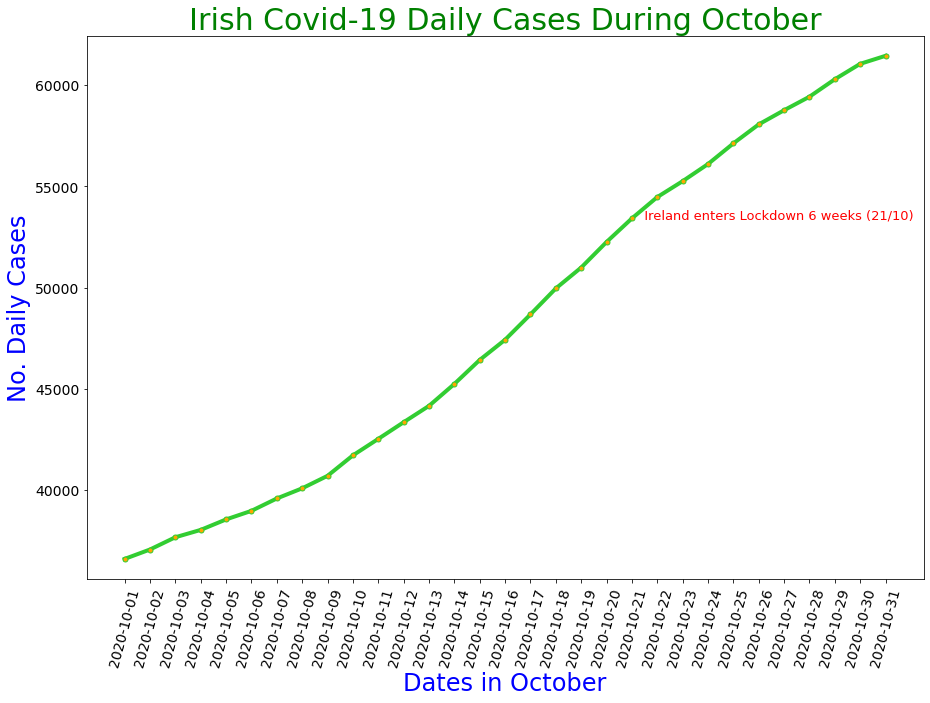

In [446]:
#representing Irish data in a line graph
plt.figure(figsize=(15,10))
plt.plot(irish_dates,irish_cases, color= "limegreen", linewidth=4, marker="o", markersize=5, markerfacecolor="orange")
plt.title("Irish Covid-19 Daily Cases During October", fontsize=30, color="green")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_irish_cases-1000,max_irish_cases+1000)
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")


# text is left-aligned
plt.text(irish_dates[lockdown_int],irish_cases[lockdown_int],"   Ireland enters Lockdown 6 weeks (21/10)",  fontsize=13, color="red")
plt.show()

The rise in the Irish number of cases shows a positive curve, representing the increase in the number of daily cases each day. While the graph is realtivley straight, it does show a small jump from it's almost linear form between the 9th and 10th of October. This rise in daily cases by over 15,000 in 20 days is obvioulsy a clear factor for the implemtentation of Level 5 lockdown here in Ireland, to prevent the spread of the virus. The lockdown shows a small decrease in the growth rate of daily viruses, but still shows growth from before the lockdown period. This may be due to the incubation period of the virus, because people may have caught it before lockdown and been subsequently tested, and/or due to the ineffectivness of locking down.

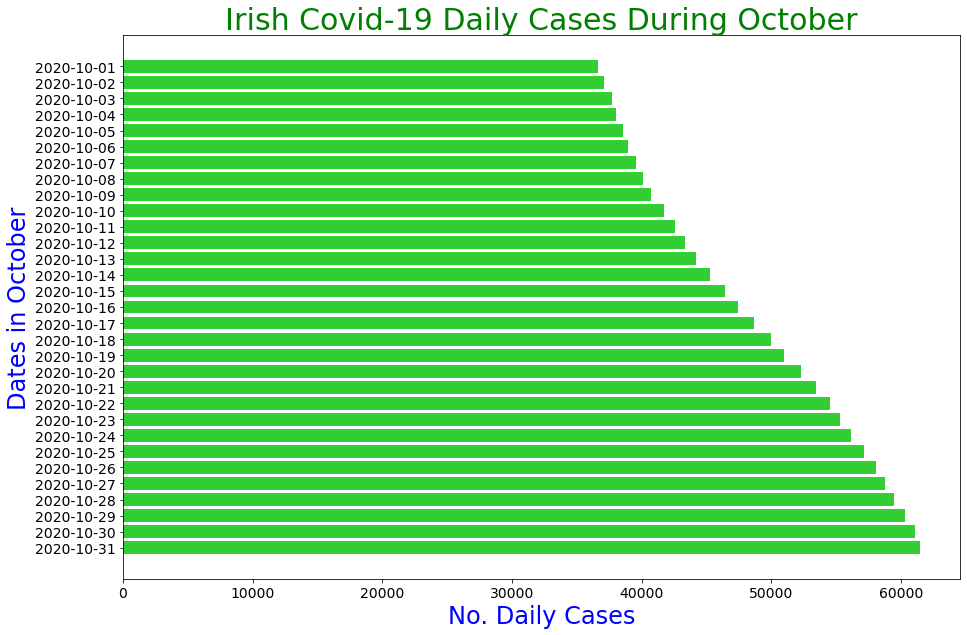

In [447]:
#Displaying Irish data in a horizontal barchar
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(irish_dates, irish_cases, align='center', color="limegreen")
plt.title("Irish Covid-19 Daily Cases During October", fontsize=30, color="green")
plt.xlabel('No. Daily Cases', fontsize=24,color="blue")
plt.ylabel('Dates in October', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().invert_yaxis()

plt.show()

This horizontal bar chart shows a vivid comparison between the growth in the number of daily cases and the overall difference the growth has made between the cases. It is clear that daily growth in cases is comparitivley small, but over the course of a month, we can see significant growth. Such growth trends suggests the number of cases over an extended period of time, such as 3 months, would lead to much more signficant growth, which is worrying.

# PART 2: SWEDEN 
## Swedish Daily Cases

In [448]:
#Table displaying the daily number of cases in Sweden
clean_swedish_table = pd.DataFrame(swedish_data)
print("Tidied up Irish Data")
clean_swedish_table

Tidied up Irish Data


,Country,Cases,Date
0,Sweden,93615,2020-10-01
1,Sweden,94283,2020-10-02
2,Sweden,94283,2020-10-03
3,Sweden,94283,2020-10-04
4,Sweden,94283,2020-10-05
5,Sweden,96145,2020-10-06
6,Sweden,96677,2020-10-07
7,Sweden,97532,2020-10-08
8,Sweden,98451,2020-10-09
9,Sweden,98451,2020-10-10


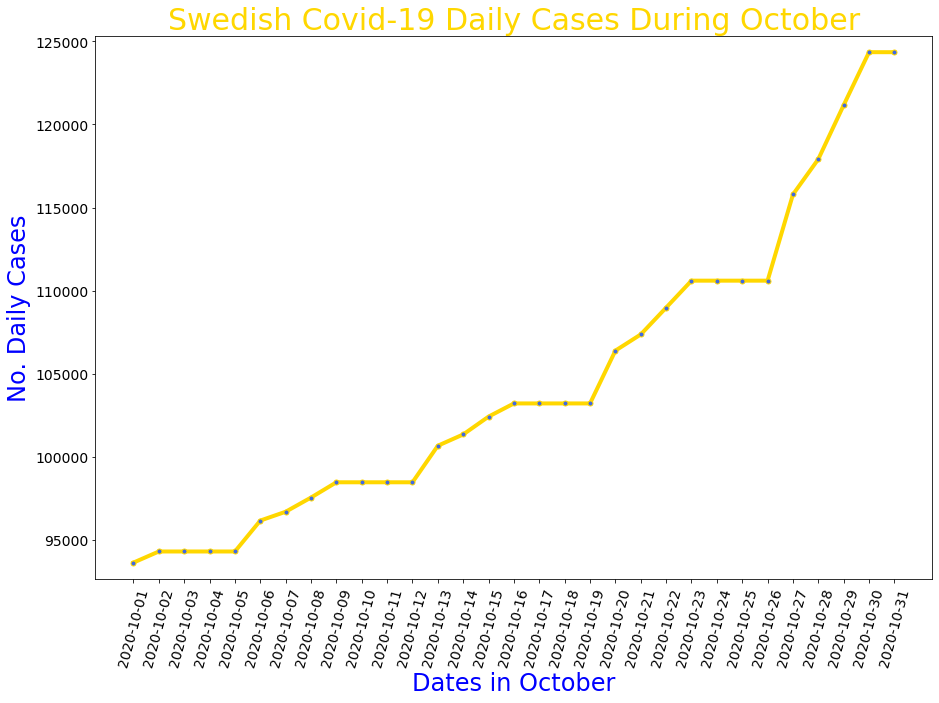

In [449]:
#Linechart showing Swedish Data
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,swedish_cases,color= "gold", linewidth=4, marker="o", markersize=5, markerfacecolor="royalblue")
plt.title("Swedish Covid-19 Daily Cases During October", fontsize=30, color="gold")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_swedish_cases-1000, max_swedish_cases+1000)
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.show()

Sweden's population is approxamitley twice that of Ireland. Unlike Ireland, Sweden have not and do not at the moment plan on locking down to prevent the spread of the virus, and take much less precaution to prevent virus spread. The growth in the number of daily cases is also positive, but far more erratic and extreme in the nature of it's growth than Irelands. The number of cases grows almost uniformly where it grows in step like increases, where the amount rises steeply, for a few days before then plateauing for 4 days, before growing in an ever-increasing steepness, before finally repeating the steps. The above graph suggest that Sweden are able prevent the growth of cases for 4 days, before the daily rate of cases increases much more at the end of this plateau. These plateaus are probably the result of limited testing resources, because they are a 4 day block of the exact same number of cases which doesn't seem to be likely in such a large sample, possibly due to Sweden's comparativley larger population. The sharp rises after the plateau periods are worrying and could be an indicator that Sweden's handelling of the pandemic has been poor. 

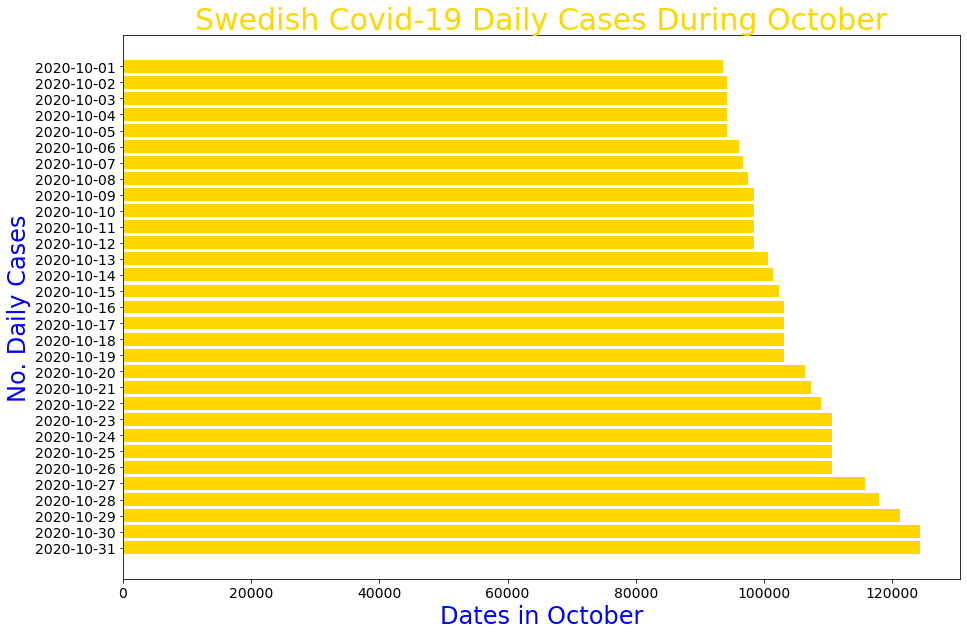

In [450]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(swedish_dates, swedish_cases, align='center', color="gold")
plt.title("Swedish Covid-19 Daily Cases During October", fontsize=30, color="gold")
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().invert_yaxis()

plt.show()

Similar to Ireland, short term growth seems relativley insignifcant, but the occurances of much clearer growths towards the ends of October tells us that Sweden are losing the battle against the virus. The large increase in the number of cases towards the end of the month may indicate that cold weather may increase the amount of cases, as the highest jumps occur right at the start of the Winter months.

# PART 3: CROATIA
## Croatian Daily Cases

In [451]:
#using Pandas to display tidied data
clean_croatian_table = pd.DataFrame(croatian_data)
print("Tidied up Croatian Data")
clean_croatian_table

Tidied up Croatian Data


,Country,Cases,Date
0,Croatia,16827,2020-10-01
1,Croatia,17160,2020-10-02
2,Croatia,17401,2020-10-03
3,Croatia,17659,2020-10-04
4,Croatia,17797,2020-10-05
5,Croatia,18084,2020-10-06
6,Croatia,18447,2020-10-07
7,Croatia,18989,2020-10-08
8,Croatia,19446,2020-10-09
9,Croatia,19932,2020-10-10


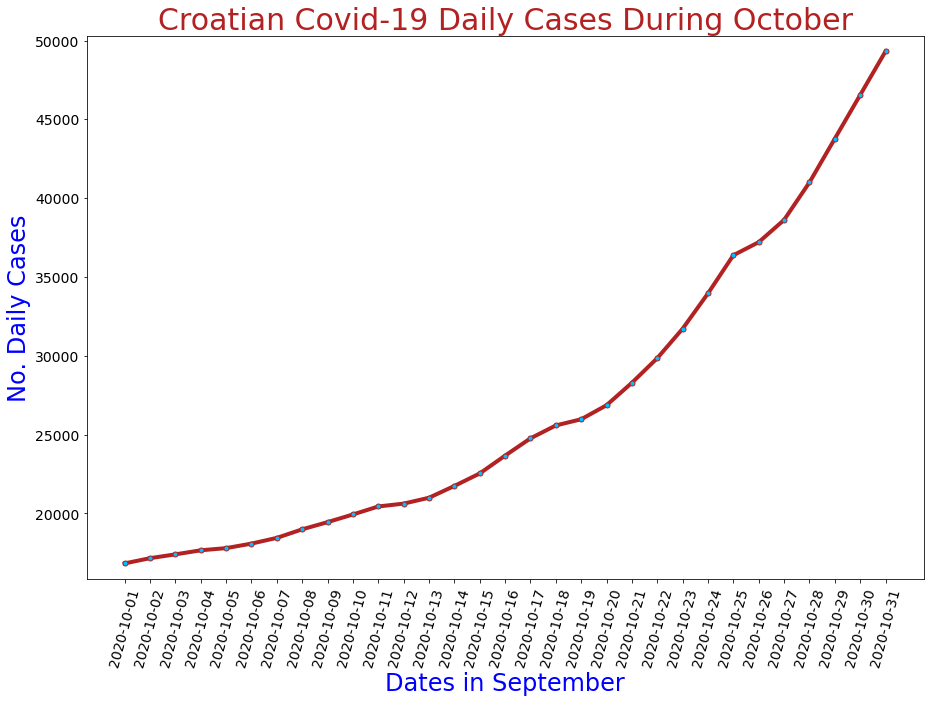

In [452]:
plt.figure(figsize=(15,10))
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4, marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Croatian Covid-19 Daily Cases During October", fontsize=30, color="firebrick")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_croatian_cases-1000, max_croatian_cases+1000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.show()

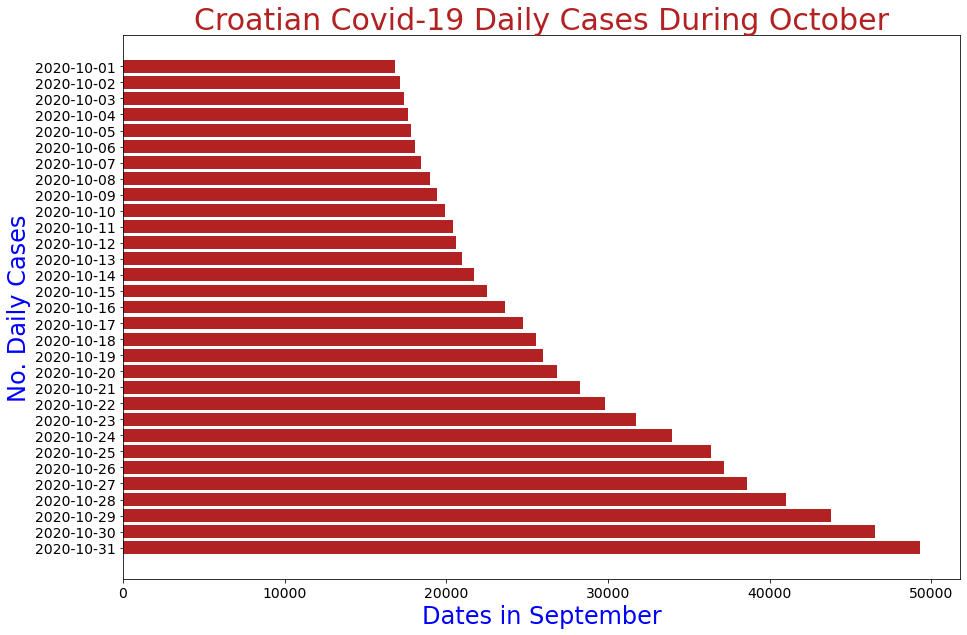

In [453]:
plt.figure(figsize=(15,10))
# set up the bar chart
plt.barh(croatian_dates, croatian_cases, align='center', color="firebrick")
plt.title("Croatian Covid-19 Daily Cases During October", fontsize=30, color="firebrick")
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gca().invert_yaxis()

plt.show()

While Croatia's number of cases is much less than Ireland's and the two countries having a very similar population, their cases are growing so much that at the end of the month of October they have actually reached over twice what they were at the start. Most of this growth has occured in the latter part of the month. It is hard to imagine that the're is any chance the spread of the virus will be controlled in Croatia if the current growth of cases persists. The graph is more similar to an exponential graph than a linear graph in shape.

# PART 4: COMPARING THE THREE COUNTRIES
# Head-to-Head Analysis

In [454]:
combined_table = pd.DataFrame(combined_data)
combined_table

,Dates,Ireland,Sweden,Croatia
0,2020-10-01,36597,93615,16827
1,2020-10-02,37063,94283,17160
2,2020-10-03,37668,94283,17401
3,2020-10-04,38032,94283,17659
4,2020-10-05,38549,94283,17797
5,2020-10-06,38973,96145,18084
6,2020-10-07,39584,96677,18447
7,2020-10-08,40086,97532,18989
8,2020-10-09,40703,98451,19446
9,2020-10-10,41714,98451,19932


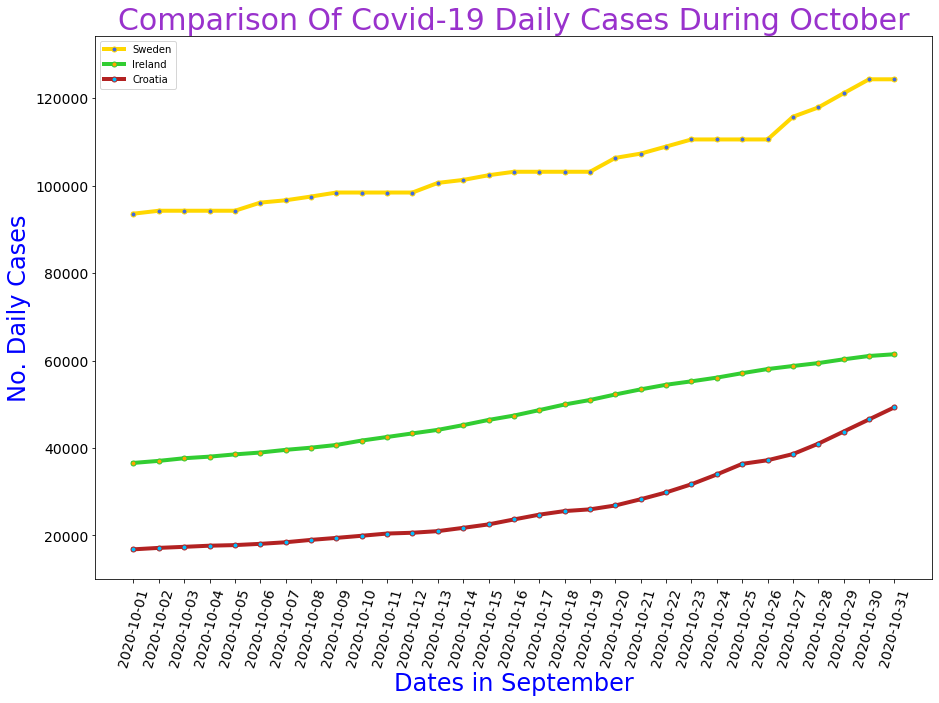

In [455]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,swedish_cases,color= "gold", linewidth=4, marker="o", markersize=5, markerfacecolor="royalblue")
plt.plot(irish_dates,irish_cases,color= "limegreen", linewidth=4,marker="o", markersize=5, markerfacecolor="orange")
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4,  marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.title("Comparison Of Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(lower_cases_limit, max_swedish_cases+10000)
plt.xlabel('Dates in September', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.gca().legend(("Sweden","Ireland","Croatia"))

plt.show()

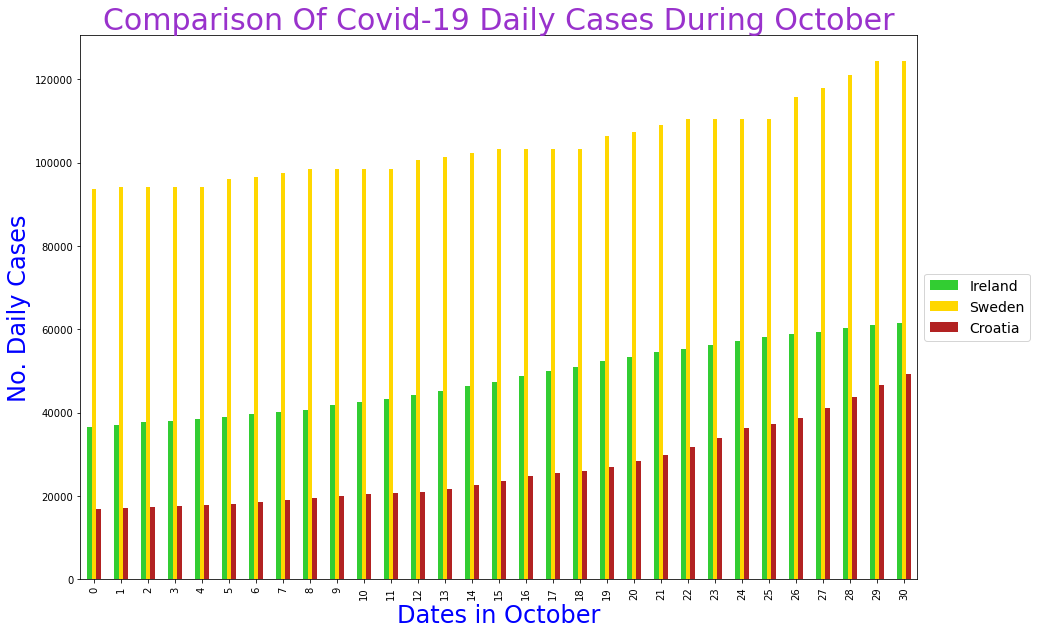

In [456]:
p=combined_table.plot.bar(figsize=(15, 10), color=["limegreen","gold","firebrick"])

p.set_xlabel('Dates in October', fontsize=24,color="blue")
p.set_ylabel('No. Daily Cases', fontsize=24,color="blue")
p.set_title("Comparison Of Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

From the previous two graphs, it is clear tha Irelands growth is the most stable, with the least growth. Something interesting I took from comparing the Irish and Croatian graphs is that while it is obvious the difference between the Irish number of cases is growing closer, the number of Croatian cases on the 31st of October is actually quite much more than the Irish cases on the 1st of October, whilst at this date the number of Croatian cases is less than half that of the number of Irish.

At the current rate of growth from the 3 countries in question, it seems more than likely that the daily number of Croatian cases will soon catch and subsequently overtake that of Ireland. This hypothesis seems even more possible with the introduction of a 6 week lockdown in Ireland and the statement from the Croatian Government that they are not planning to increase restrictions at this moment.

Sweden also appear to be slowly widening the gap between their daily number of cases and Ireland's, which is alarming.

## Average Daily Cases

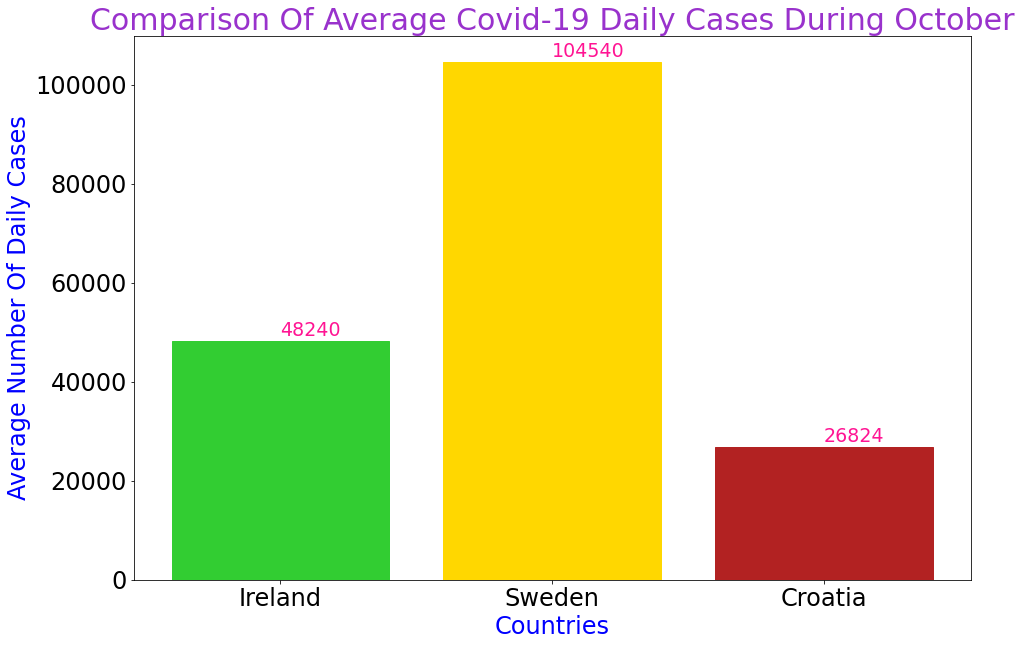

In [457]:
plt.figure(figsize=(15,10))
# set up the bar chart
barlist=plt.bar(countries, avg_cases)
plt.title("Comparison Of Average Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
barlist[0].set_color("limegreen")
barlist[1].set_color("gold")
barlist[2].set_color("firebrick")
plt.ylabel("Average Number Of Daily Cases", fontsize=24, color="blue")
plt.xlabel("Countries", fontsize=24, color="blue")
# increase the font sizes on the axes
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

for i in range(len(countries)):
    plt.annotate(int(avg_cases[i]), xy=(countries[i],avg_cases[i]+1000),fontsize=19,color="deeppink" )
   


plt.show()


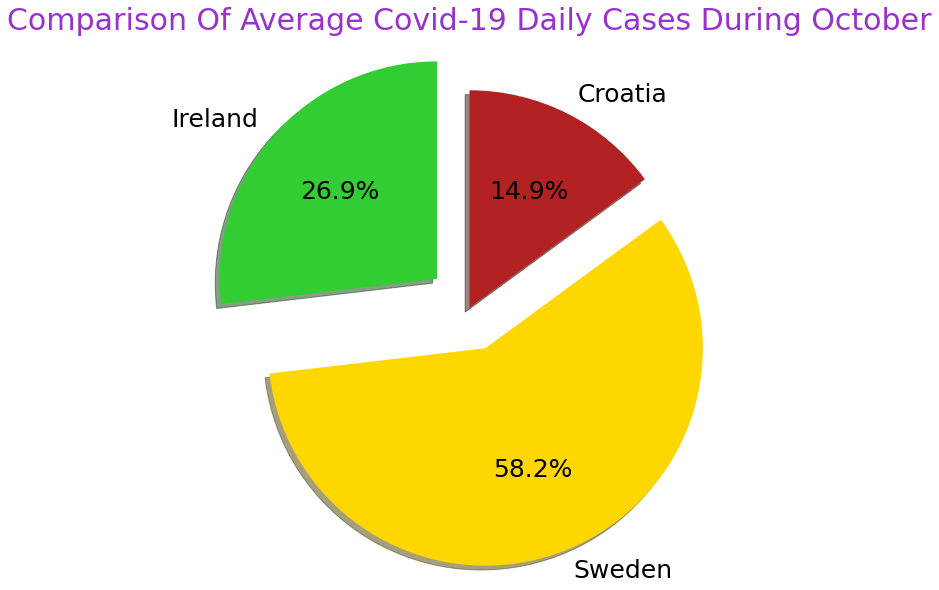

In [458]:
plt.figure(figsize=(10,10))
plt.title("Comparison Of Average Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
explode = (0.2, 0.2,0)
# create the pie chart on the sample data
p = plt.pie(avg_cases, explode=explode, labels=countries, colors=["limegreen","gold","firebrick"], autopct="%.1f%%",
           shadow=True, startangle=90,textprops={'fontsize': 25})
plt.show()

The above pie chart represents the comparison of the average cases. In a perfect mathematical world the cases would be spilt around Ireland, Croatia and Sweden, 25%, 25% and 50% respectivley. While Sweden's slightly larger daily average can be attributed to their larger population, we also should strongly consider therir policies and traditionally colder climate, especially as our recoreded data was taken near the beginning of Winter.

Croatia has a Mediterranean climate which could be a reason for the Eastern European nation having lower average cases than Ireland, However this factor should not be a sole reason for the current means of cases for October. It could more than likley be a case that Ireland has simply tested more people during the month, than Croatia has, resulting to a naturally bigger daily average, much like Sweden.

## A Closer Look: Ireland and Croatia

In [459]:
#Face-to-face Ireland and Croatia

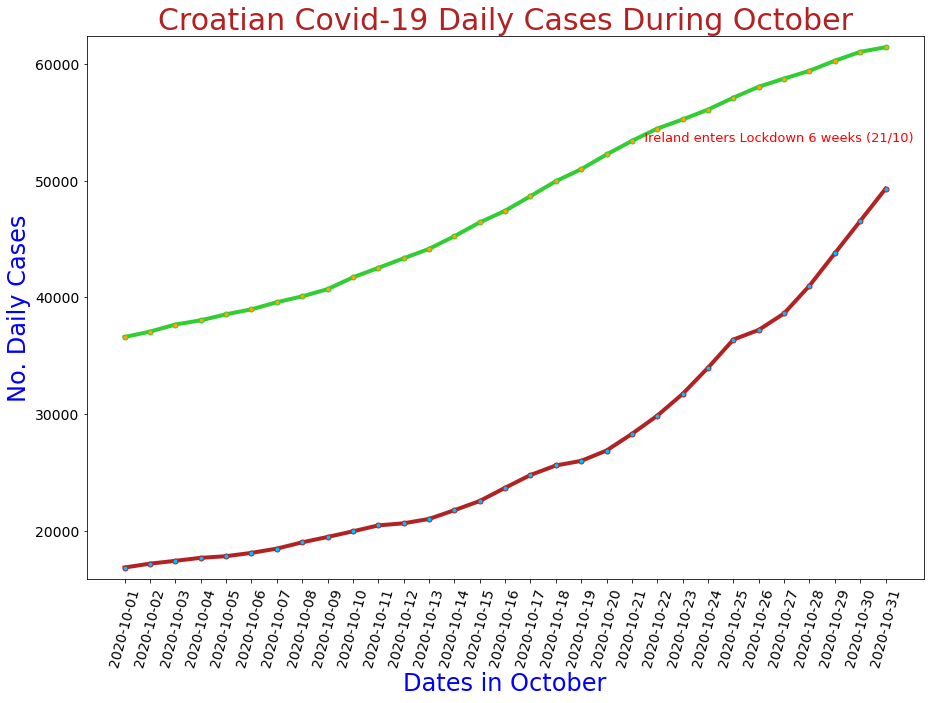

In [460]:
plt.figure(figsize=(15,10))
plt.plot(irish_dates,irish_cases, color= "limegreen", linewidth=4, marker="o", markersize=5, markerfacecolor="orange")
plt.title("Croatian Covid-19 Daily Cases During October", fontsize=30, color="firebrick")
plt.plot(croatian_dates,croatian_cases,color= "firebrick", linewidth=4,  marker="o", markersize=5, markerfacecolor="deepskyblue")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(min_croatian_cases-1000,max_irish_cases+1000)
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")


# text is left-aligned
plt.text(irish_dates[lockdown_int],irish_cases[lockdown_int],"   Ireland enters Lockdown 6 weeks (21/10)",  fontsize=13, color="red")
plt.show()

<b>Observation:</b> For 2 very similarly populated countries, Ireland has much more daily cases than Croatia

Upon closer inspection we can see that the number of Croatian daily cases is quickly gaining on the Irish ones. The fact there are more Croatian cases on October 31st than Irish on October 1st, could indicate a poorer management of the outbreak in Croatia, or moreover, a sign of the rapid growth of the disease world wide everywhere, as time progresses.

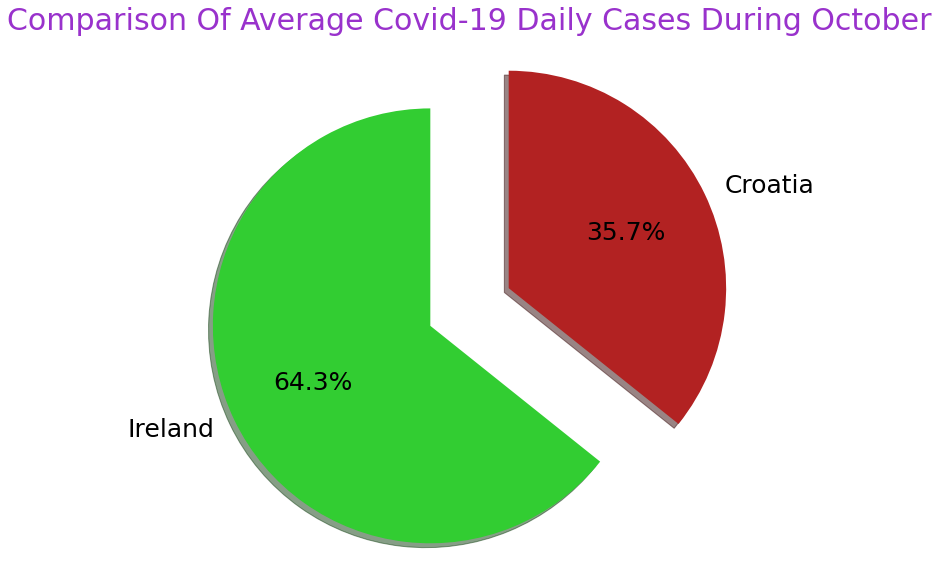

In [461]:
#remove Sweden from the analysis for this section
countries.remove("Sweden")
avg_cases.remove(swedish_average_cases)

plt.figure(figsize=(10,10))
plt.title("Comparison Of Average Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
explode = (0.2, 0.2)
# create the pie chart on the sample data
p = plt.pie(avg_cases, explode=explode, labels=countries, colors=["limegreen","firebrick"], autopct="%.1f%%",
           shadow=True, startangle=90,textprops={'fontsize': 25})
plt.show()

# PART 5: AN INTERESTING THOUGHT...

As I've mentioned several times already, Ireland's population is roughly 50% of Sweden's. While drawing insights from these countries might be difficult due to the differences in the countries populations. For this reason, I decided to do a little experiment to see how effective the Irish precautions and lockdown have been in controlling the spread of the virus. I thought I would proportionatley adjust the number of cases to get some sort of idea of what Sweden by halving it's cases in October and comparing the new data to Ireland's data

<b>NOTE:</b> The following data is just a rough visualization to see try compare the spread of the disease in Ireland and Sweden proportionatley through visualization. All Swedish data displayed below has been altered for this reason. 

In [462]:
#Dividing the swedish daily cases by two as Sweden's population =~2*Ireland's population
proportionate_swedish_cases = [i / 2 for i in swedish_cases]

i=0
for day in proportianate_swedish_cases:
    proportionate_swedish_cases[i]=intConversion(day)
    i=i+1

In [463]:
#New dictionary of adapted swedish data
updated_combined_data={"Dates":irish_dates,"Ireland":irish_cases,"Sweden (proportionally adjusted)":proportionate_swedish_cases}

In [464]:
updated_combined_table = pd.DataFrame(updated_combined_data)
updated_combined_table

,Dates,Ireland,Sweden (proportionally adjusted)
0,2020-10-01,36597,46807
1,2020-10-02,37063,47141
2,2020-10-03,37668,47141
3,2020-10-04,38032,47141
4,2020-10-05,38549,47141
5,2020-10-06,38973,48072
6,2020-10-07,39584,48338
7,2020-10-08,40086,48766
8,2020-10-09,40703,49225
9,2020-10-10,41714,49225


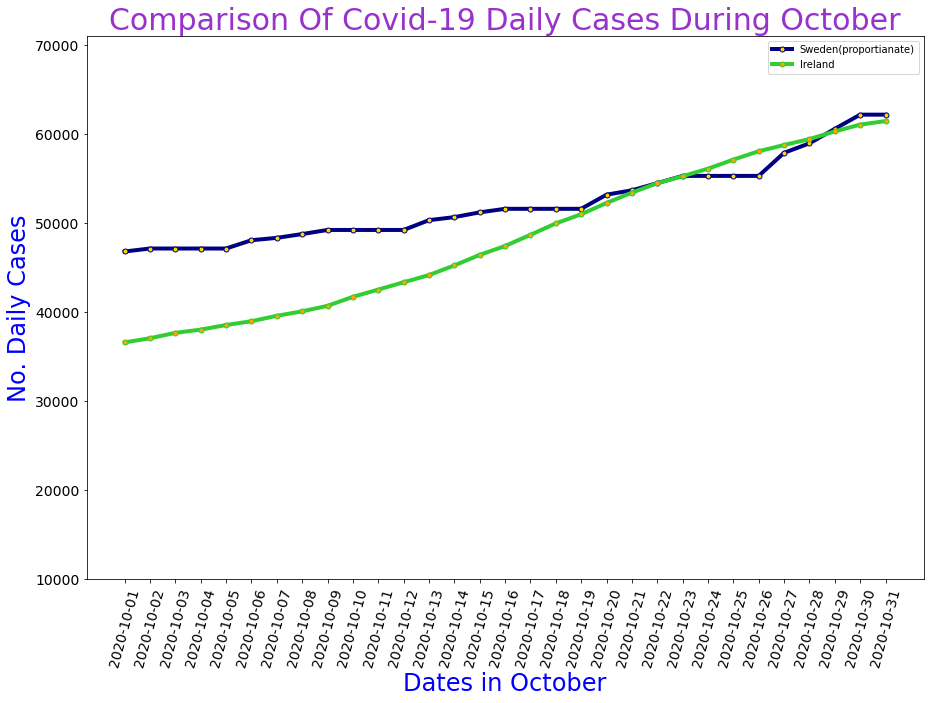

In [465]:
plt.figure(figsize=(15,10))
plt.plot(swedish_dates,proportianate_swedish_cases,color= "navy", linewidth=4, marker="o", markersize=5, markerfacecolor="gold")
plt.plot(irish_dates,irish_cases,color= "limegreen", linewidth=4,marker="o", markersize=5, markerfacecolor="orange")
plt.title("Comparison Of Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(lower_cases_limit, max_swedish_cases/1.75)
plt.xlabel('Dates in October', fontsize=24,color="blue")
plt.ylabel('No. Daily Cases', fontsize=24,color="blue")

plt.gca().legend(("Sweden(proportianate)","Ireland","Croatia"))

plt.show()

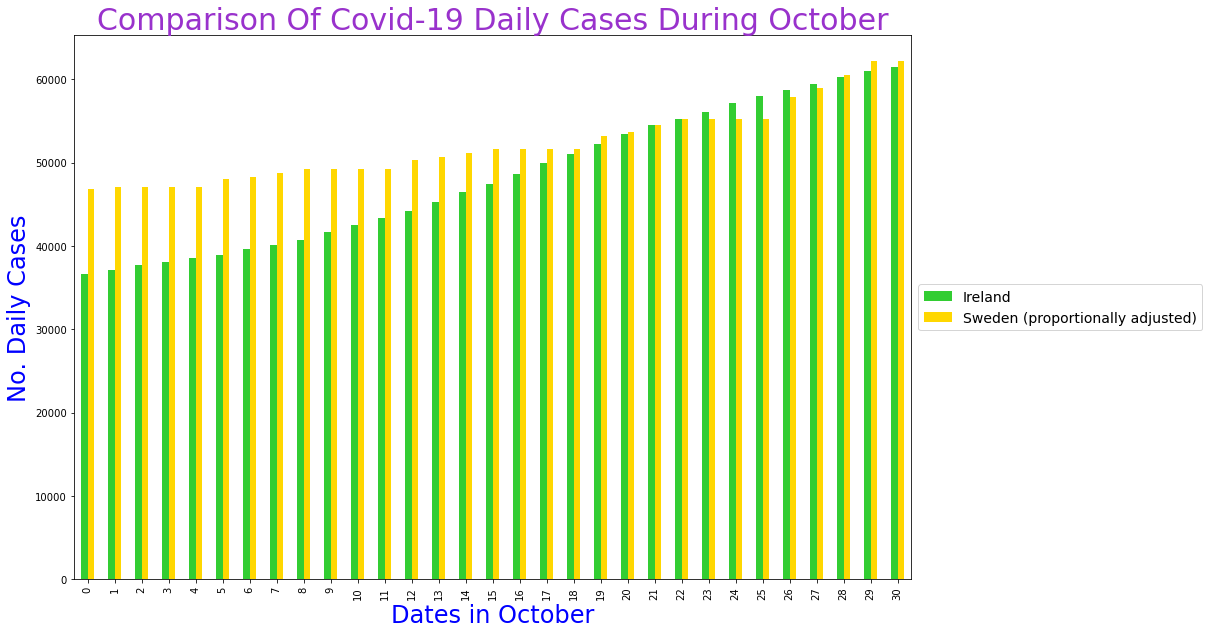

In [466]:
p=updated_combined_table.plot.bar(figsize=(15, 10), color=["limegreen","gold"])

p.set_xlabel('Dates in October', fontsize=24,color="blue")
p.set_ylabel('No. Daily Cases', fontsize=24,color="blue")
p.set_title("Comparison Of Covid-19 Daily Cases During October", fontsize=30, color="darkorchid")
# move the legend to outside the plot
p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

The number of Irish cases is generally less than the adapted Swedish, however the gap narrows as the day goes on and the Irish number of cases overtakes the Swedish in the latter part of the month. As Swedens population is over twice that of Irelands that means for these days Ireland had more cases per capita than Sweden which is a negative sign for Ireland, because Ireland has taken much more virus spreading precautions than Sweden. A positive to take from this is that Ireland's cases are only greater than Sweden's for 5 out of the 31 days in the month. This is too little evidence to suggest that Ireland's political strategies for combatting Covid-19 are ineffective.


# PART 6: CONCLUSION
To conclude, I have tested the water on many ideas throughout my notebook. Some key insights I have gained from my Data analysis are:
* Sweden has generally more cases because they have the largest population of the sample and have not been enforcing any anti-virus policies.
* Ireland has more cases than Croatia, but Ireland's number of daily cases have stopped increasing as much due to new government policy, whilst the number of Croatian daily cases is quickly catching up.
* The fact all of the countries have positive graphs means that regardless of government policy and climate in our 3 countries, the number of Covid-19 is still on the rise in all of the countries, which is not a good sign for their economies.
* Ireland has a more stable number of daily cases than Sweden and Croatia in the month of October as shown in the graphs.

If i was to preform a more detailled analysis on the subject, i would delve more into the number of tests taken per country and into the demographics and geographics of the virus' infection rate to draw more correllations from the data. Finally, a longer time period may prove more comprehensive to understanding the spreading nature of the virus.